In [2]:
import os
path = os.listdir('DenoisedTrainImages')
path = sorted(path)

In [3]:
path

['denoised_1.png',
 'denoised_10.png',
 'denoised_100.png',
 'denoised_101.png',
 'denoised_102.png',
 'denoised_103.png',
 'denoised_104.png',
 'denoised_105.png',
 'denoised_106.png',
 'denoised_107.png',
 'denoised_108.png',
 'denoised_109.png',
 'denoised_11.png',
 'denoised_110.png',
 'denoised_111.png',
 'denoised_112.png',
 'denoised_113.png',
 'denoised_114.png',
 'denoised_115.png',
 'denoised_116.png',
 'denoised_117.png',
 'denoised_118.png',
 'denoised_119.png',
 'denoised_12.png',
 'denoised_120.png',
 'denoised_121.png',
 'denoised_122.png',
 'denoised_123.png',
 'denoised_124.png',
 'denoised_125.png',
 'denoised_126.png',
 'denoised_127.png',
 'denoised_128.png',
 'denoised_129.png',
 'denoised_13.png',
 'denoised_130.png',
 'denoised_131.png',
 'denoised_132.png',
 'denoised_133.png',
 'denoised_134.png',
 'denoised_135.png',
 'denoised_136.png',
 'denoised_137.png',
 'denoised_138.png',
 'denoised_139.png',
 'denoised_14.png',
 'denoised_140.png',
 'denoised_141.png',

In [4]:
import imageio

images = []
for p in path:
    image = imageio.imread('DenoisedTrainImages/' + p)
    images.append(image)

C:\Users\user\AppData\Local\Temp\ipykernel_30236\2287568032.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('DenoisedTrainImages/' + p)


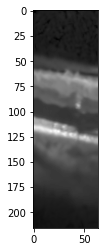

In [5]:
from matplotlib import pyplot as plt
import numpy as np

images = np.array(images)
plt.imshow(images[0],cmap = "gray")

In [6]:
images[0].shape

(216, 64)

In [7]:
import numpy as np

labels = np.load('resized_cropped_labeledimages.npy')

In [8]:
labels.shape

(770, 216, 64)

In [9]:
train_labels = np.zeros((770,216,64,8))
for i in range(770):
    for j in range(216) :
        for k in range(64):
            if labels[i][j][k] == 0:
                train_labels[i][j][k][0] = 1
            if labels[i][j][k] == 1:
                train_labels[i][j][k][1] = 1
            if labels[i][j][k] == 2:
                train_labels[i][j][k][2] = 1
            if labels[i][j][k] == 3:
                train_labels[i][j][k][3] = 1
            if labels[i][j][k] == 4:
                train_labels[i][j][k][4] = 1
            if labels[i][j][k] == 5:
                train_labels[i][j][k][5] = 1
            if labels[i][j][k] == 6:
                train_labels[i][j][k][6] = 1
            if labels[i][j][k] == 7:
                train_labels[i][j][k][7] = 1

In [10]:
train_labels[0][0][0]

array([1., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
images = images.reshape(images.shape[0],216,64,1)

In [12]:
weights = np.load('weighted_cropped_images.npy')

In [13]:
weights.shape

(770, 216, 64)

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, w_train, w_test = train_test_split(images,train_labels,weights,test_size=0.35)

In [15]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(w_train.shape)

(500, 216, 64, 1)
(270, 216, 64, 1)
(500, 216, 64, 8)
(500, 216, 64)


In [17]:
data_shape = 216*64
weight_decay = 0.0001

In [18]:
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, UpSampling2D, Reshape, Concatenate
from keras import Input, Model, regularizers

# Defines the input tensor
inputs = Input(shape=(216,64,1))

L1 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(inputs)
L2 = BatchNormalization()(L1)
L2 = Activation('relu')(L2)
#L3 = Lambda(maxpool_1,output_shape = shape)(L2)
L3 = MaxPooling2D(pool_size=(2,2))(L2)
L4 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L3)
L5 = BatchNormalization()(L4)
L5 = Activation('relu')(L5)
#L6 = Lambda(maxpool_2,output_shape = shape)(L5)
L6 = MaxPooling2D(pool_size=(2,2))(L5)
L7 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L6)
L8 = BatchNormalization()(L7)
L8 = Activation('relu')(L8)
#L9 = Lambda(maxpool_3,output_shape = shape)(L8)
L9 = MaxPooling2D(pool_size=(2,2))(L8)
L10 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L9)
L11 = BatchNormalization()(L10)
L11 = Activation('relu')(L11)
L12 = UpSampling2D(size = (2,2))(L11)
#L12 = Lambda(unpool_3,output_shape = unpool_shape)(L11)
L13 = Concatenate(axis = 3)([L8,L12])
L14 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L13)
L15 = BatchNormalization()(L14)
L15 = Activation('relu')(L15)
L16 = UpSampling2D(size= (2,2))(L15)
#L16 = Lambda(unpool_2,output_shape=unpool_shape)(L15)
L17 = Concatenate(axis = 3)([L16,L5])
L18 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L17)
L19 = BatchNormalization()(L18)
L19 = Activation('relu')(L19)
#L20 = Lambda(unpool_1,output_shape=unpool_shape)(L19)
L20 = UpSampling2D(size=(2,2),name = "Layer19")(L19)
L21 = Concatenate(axis=3)([L20,L2])
L22 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L21)
L23 = BatchNormalization()(L22)
L23 = Activation('relu')(L23)
L24 = Conv2D(8,kernel_size=(1,1),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L23)
L = Reshape((data_shape,8),input_shape = (216,64,8))(L24)
L = Activation('softmax')(L)
model = Model(inputs = inputs, outputs = L)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 216, 64, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 216, 64, 64)  640         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 216, 64, 64)  256        ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [19]:
w_train = np.reshape(w_train,(500,data_shape))
w_train.shape

(500, 13824)

In [20]:
y_train = np.reshape(y_train,(500,data_shape,8))
y_test = np.reshape(y_test,(270,data_shape,8))
print(y_train.shape)
print(y_test.shape)

(500, 13824, 8)
(270, 13824, 8)


In [21]:
count = np.zeros(8)
for i in range(500):
    for j in range(13824):
        for k in range(8):
            if y_train[i][j][k]==1:
                count[k] = count[k]+1

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\user\AppData\Local\Temp\ipykernel_30236\2727931942.py", line -1, in <cell line: 2>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 1992, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\ultratb.py", line 1012, in structured_traceback
    return VerboseTB.structur

In [ ]:
count

In [66]:
count = y_train.sum(axis=1).sum(axis=0)
count

array([4000562.,  324645.,  587309.,  335881.,  261770.,  905120.,
        273685.,  223028.])

In [67]:
count = np.median(count)/count
count

array([0.08255415, 1.01730506, 0.56233261, 0.98327384, 1.26165336,
       0.36488311, 1.20672671, 1.48081407])

In [68]:
count = count/count[0]
count

array([ 1.        , 12.32288192,  6.81168176, 11.91065288, 15.28273675,
        4.41992443, 14.61739591, 17.93748767])

In [22]:
from keras import backend as K

smooth = 1

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [23]:
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [24]:
def customized_loss(y_true,y_pred):
    return (1*K.categorical_crossentropy(y_true, y_pred))+(0.5*dice_coef_loss(y_true, y_pred))

In [25]:
from keras import optimizers

optimiser = optimizers.Adam(lr = 0.01)
model.compile(optimizer=optimiser,loss=customized_loss,metrics=['accuracy',dice_coef],sample_weight_mode='temporal')


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger, ModelCheckpoint

#Defining Callback functions which will be called by model during runtime when specified condition satisfies
lr_reducer = ReduceLROnPlateau(factor=0.5, cooldown=0, patience=6, min_lr=0.5e-6)
csv_logger = CSVLogger('Relaynet_sample_weights_denoised_lr_e2_testing_bs_20.csv')
model_chekpoint = ModelCheckpoint("Relaynet_sample_weights_denoised_lr_e2_testing_bs_20.hdf5",monitor = 'val_loss',verbose = 1,save_best_only=True)

In [27]:
%%time
model.fit(x_train,y_train,batch_size=20,epochs=60,validation_data=(x_test,y_test),sample_weight=w_train,callbacks=[lr_reducer, csv_logger,model_chekpoint])

Epoch 1/60
25/25 [==============================] - ETA: 0s - loss: 9.7623 - accuracy: 0.4413 - dice_coef: 0.3261
Epoch 1: val_loss improved from inf to 655.66431, saving model to Relaynet_sample_weights_denoised_lr_e2_testing_bs_20.hdf5
25/25 [==============================] - 121s 5s/step - loss: 9.7623 - accuracy: 0.4413 - dice_coef: 0.3261 - val_loss: 655.6643 - val_accuracy: 0.0327 - val_dice_coef: 0.0328 - lr: 0.0100
Epoch 2/60
25/25 [==============================] - ETA: 0s - loss: 8.5432 - accuracy: 0.4770 - dice_coef: 0.3882
Epoch 2: val_loss improved from 655.66431 to 64.83040, saving model to Relaynet_sample_weights_denoised_lr_e2_testing_bs_20.hdf5
25/25 [==============================] - 108s 4s/step - loss: 8.5432 - accuracy: 0.4770 - dice_coef: 0.3882 - val_loss: 64.8304 - val_accuracy: 0.0445 - val_dice_coef: 0.0493 - lr: 0.0100
Epoch 3/60
25/25 [==============================] - ETA: 0s - loss: 8.2210 - accuracy: 0.4740 - dice_coef: 0.3991
Epoch 3: val_loss improved f

(216, 64, 1)
(216, 64)


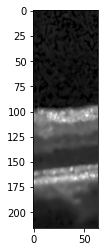

In [28]:
obj = x_train[28]
print(obj.shape)
obj = np.squeeze(obj,axis = 2)
print(obj.shape)
plt.imshow(obj,cmap = "gray")

In [29]:
obj = obj.reshape((1,216,64,1))
prediction = model.predict(obj)
print(prediction.shape)
prediction = np.squeeze(prediction,axis = 0)
print(prediction.shape)
prediction = np.reshape(prediction,(216,64,8))

1/1 [==============================] - 1s 1s/step
(1, 13824, 8)
(13824, 8)


In [30]:
output = np.zeros((216,64))
ground = np.zeros((216,64))
for i in range(216):
    for j in range(64):
        output[i][j] = np.argmax(prediction[i][j])

In [31]:
test_ground_truth = np.reshape(train_labels[28],(216,64,8))
for i in range(216):
    for j in range(64):
        ground[i][j] = np.argmax(test_ground_truth[i][j])
for i in range(216):
    for j in range(64):
        output[i][j] = np.argmax(prediction[i][j])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


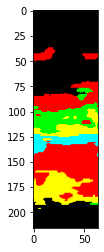

In [32]:
color_pred = np.zeros((216,64,3))
for j in range(216):
    for k in range(64):
        if output[j][k]==0:
            color_pred[j][k] = [0,0,0]
        if output[j][k]==1:
            color_pred[j][k] = [128,0,0]
        if output[j][k]==2:
            color_pred[j][k] = [0,128,0]
        if output[j][k]==3:
            color_pred[j][k] = [128,128,0]
        if output[j][k]==4:
            color_pred[j][k] = [0,128,128]
        if output[j][k]==5:
            color_pred[j][k] = [64,0,0]
        if output[j][k]==6:
            color_pred[j][k] = [192,0,0]
        if output[j][k]==7:
            color_pred[j][k] = [64,128,0]
plt.imshow(color_pred)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


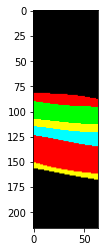

In [33]:
color_true = np.zeros((216,64,3))
for j in range(216):
    for k in range(64):
        if ground[j][k]==0:
            color_true[j][k] = [0,0,0]
        if ground[j][k]==1:
            color_true[j][k] = [128,0,0]
        if ground[j][k]==2:
            color_true[j][k] = [0,128,0]
        if ground[j][k]==3:
            color_true[j][k] = [128,128,0]
        if ground[j][k]==4:
            color_true[j][k] = [0,128,128]
        if ground[j][k]==5:
            color_true[j][k] = [64,0,0]
        if ground[j][k]==6:
            color_true[j][k] = [192,0,0]
        if ground[j][k]==7:
            color_true[j][k] = [64,128,0]
plt.imshow(color_true)